# CRISP-DM Data Science process

## Analyzing the Seattle and Boston Airbnb Listing Data
### Business Understanding
From the Airbnb Data one can gain insight on how the rental price is set up in both Seattle and Boston, and what features contribute to the top rental amenities. Questions would be investigated are: <br>
1): Are there significant difference between Boston and Seattle Airbnb data? <br>
2): What features are most dominant to determine the rental price in both markets?<br>
3): What amenities are import to determine the rental price in both markets?<br>
### Data Preprocessing
Boston Airbnb has 3585 entires in the listing, while Seattle Airbnb has 3818 entries. There are 29819 total missing values in Seattle data and 50229 missing values in Boston Data. Data preparation includes many missing values are dropped and NA values are taken care of individually. Moreover, the minmax scalar is used to scale the nuerical values. 
### Supervised Learning Model Traning
An Ensemble supervised learning method: Random Forest Regressor is chosen since we want to investigate the importance of features that are dominate the rental. It is interesting to notice that Random Forest Regressor model trained with Boston Market data yield a R2 testing socre about 60%, while it only give about 30% R2 testing score on Seattle data. It should be further investigated. 
### Result and Medium Post
The Roomtype_entire_home/apt and bedrooms are the most dominant features in determining the price in both Seattle and Boston markets. It makes sense as these two factors are relevant with the size of the home/apartment. The next influential features in both markets are the location and zip code.
The amenities contribute less in both markets, but interesting to observe that elevator in building is the most desireable amenities in both market. 
The medium post is https://medium.com/@huangr76/what-determine-the-airbnb-price-a-look-at-boston-and-seattle-data-16a6a2606187



In [1]:
## import packages 
import numpy as np
import pandas as pd
# import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date
from datetime import datetime
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score


In [2]:
#load data
Boston_listing = pd.read_csv("Boston_listings.csv")
Seattle_listing = pd.read_csv("Seattle_listings.csv")

In [3]:
Boston_listing.head()


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [4]:
Boston_listing.shape

(3585, 95)

In [5]:
Seattle_listing.shape

(3818, 92)

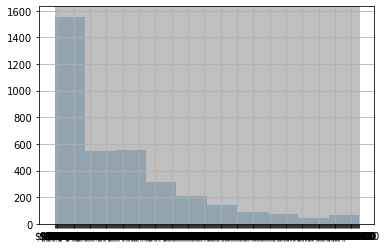

In [6]:
Boston_listing['price'].hist()

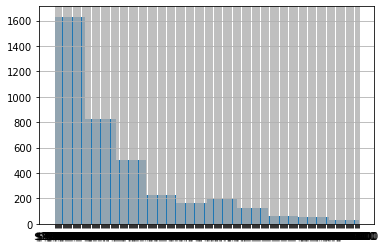

In [7]:
Seattle_listing['price'].hist()

In [8]:
Boston_listing.isnull().sum().sum()

50229

In [9]:
## checking the missing data from two data sets

drop_col = Seattle_listing.isnull().sum()/Seattle_listing.shape[0] 
drop_col = drop_col[drop_col > 0.4].index
len(drop_col)
drop_col
Seattle_listing.drop(drop_col, axis= 1, inplace = True)


In [10]:
drop_col = Boston_listing.isnull().sum()/Boston_listing.shape[0] 
drop_col = drop_col[drop_col > 0.4].index
len(drop_col)
drop_col
Boston_listing.drop(drop_col, axis = 1, inplace = True)

### Data Observation
There are 6 columns with more than 40% missing values in Seattle data, namely ('notes', 'square_feet', 'weekly_price', 'monthly_price','security_deposit', 'license'). Hence are dropped. Similarly, there are 11 columns with more than 40% missing values in Boston Data ('notes', 'access', 'interaction', 'neighbourhood_group_cleansed','square_feet', 'weekly_price', 'monthly_price', 'security_deposit','has_availability', 'license', 'jurisdiction_names') and are dropped.

In [11]:
Boston_listing.shape

(3585, 84)

In [12]:
## convert the price from string to float
if type(Boston_listing.price[0]) == str:
        Boston_listing.price = Boston_listing.price.apply(lambda x: float(x[1:].replace(',', '')))
if type(Seattle_listing.price[0]) == str:
            Seattle_listing.price = Seattle_listing.price.apply(lambda x: float(x[1:].replace(',', '')))

In [13]:
Boston_listing.price.describe()


count    3585.000000
mean      173.925802
std       148.331321
min        10.000000
25%        85.000000
50%       150.000000
75%       220.000000
max      4000.000000
Name: price, dtype: float64

In [14]:
Seattle_listing.price.describe()

count    3818.000000
mean      127.976166
std        90.250022
min        20.000000
25%        75.000000
50%       100.000000
75%       150.000000
max      1000.000000
Name: price, dtype: float64

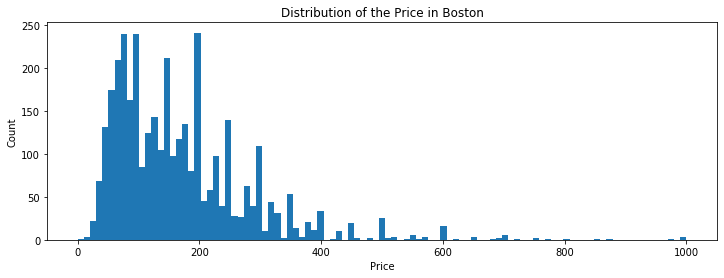

In [15]:
plt.figure(figsize=(12,4))
plt.title('Distribution of the Price in Boston')
plt.hist(Boston_listing.price,bins = np.linspace(0,1000,100))
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

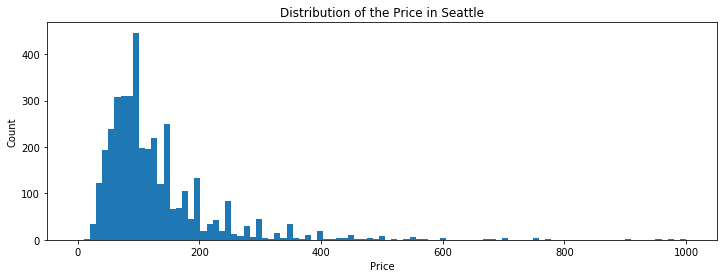

In [16]:
plt.figure(figsize=(12,4))
plt.title('Distribution of the Price in Seattle')
plt.hist(Seattle_listing.price,bins = np.linspace(0,1000,100))
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

### Data Observation
The average price in Boston is $174, with standard deviation of $148, the maximum daily rate is $4000 and 50% of the prices are under $150,  and 75% of hte price are under $220. The average price in Boston is $127, with standard deviation of $90, the maximum daily rate is $1000 and 50% of the prices are under $100,  and 75% of hte price are under $150. 

In [17]:
### Drop a few columns that do not make sense
drop_col=['host_since','space', 'neighborhood_overview', 'transit', 'house_rules','listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'description', 
               'experiences_offered', 'picture_url', 'host_url', 'host_name', 'host_thumbnail_url', 'host_about', 'host_neighbourhood',
              'host_picture_url', 'host_location', 'street', 'city', 'state', 'smart_location', 'country_code', 'country', 'first_review', 'last_review', 'id', 'host_verifications', 
               'host_id', 'neighbourhood', 'calendar_last_scraped', 'market', 'thumbnail_url', 'medium_url', 'xl_picture_url', ]

Boston_listing.drop(drop_col, axis =1, inplace = True)
Boston_listing.shape

(3585, 47)

In [18]:
drop_col = ['host_since','space', 'neighborhood_overview', 'transit','listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'description', 
               'experiences_offered', 'picture_url', 'host_url', 'host_name', 'host_thumbnail_url', 'host_about', 'host_neighbourhood',
              'host_picture_url', 'host_location', 'street', 'city', 'state', 'smart_location', 'country_code', 'country', 'first_review', 'last_review', 'id', 'host_verifications', 
               'host_id', 'neighbourhood', 'calendar_last_scraped', 'market', 'thumbnail_url', 'medium_url', 'xl_picture_url']
Seattle_listing.drop(drop_col, axis =1, inplace = True)
Seattle_listing.shape

(3818, 50)

In [19]:
Boston_listing.columns

Index(['host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_listings_count', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'zipcode', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price',
       'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights',
       'maximum_nights', 'calendar_updated', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'requires_license', 'instant_bookable',
       'cancellation_policy', 'require_guest_profile_picture',
       'require_guest_phone_ve

In [20]:
#From the price histogram, there are some price outliers in both cities. 
## We elected to only work with the 95% of the price data. 
drop_row = Boston_listing[Boston_listing.price>Boston_listing.price.quantile(0.95)].index
Boston_listing.drop(drop_row, axis = 0, inplace = True)

In [21]:
drop_row = Seattle_listing[Seattle_listing.price>Seattle_listing.price.quantile(0.95)].index
Seattle_listing.drop(drop_row, axis = 0, inplace = True)

Seattle_listing.shape

(3630, 50)

In [22]:
## translate the amenities column into categorical variables

amenities = Boston_listing['amenities'].map(lambda d: [amenity.replace('"', "").replace("{", "").replace("}", "") for amenity in d.split(",")])
Boston_listing['amenities'] = amenities



In [23]:
B_amenities = set([item for sublist in amenities for item in sublist])
B_amenities = list(B_amenities)


In [24]:
#B_amenities.pop(0)


In [25]:
B_amenities
len(B_amenities)

46

In [26]:
mlb = MultiLabelBinarizer()
amenities_B = pd.DataFrame(mlb.fit_transform(Boston_listing['amenities']),columns=mlb.classes_, index=Boston_listing.index)

In [27]:
Boston_listing = pd.concat([Boston_listing, amenities_B], axis=1, sort = False)


In [28]:
Boston_listing.shape


(3408, 93)

In [29]:
amenities = Seattle_listing['amenities'].map(lambda d: [amenity.replace('"', "").replace("{", "").replace("}", "") for amenity in d.split(",")])
Seattle_listing['amenities'] = amenities
S_amenities = set([item for sublist in amenities for item in sublist])
S_amenities = list(S_amenities)
#S_amenities.pop(0)
amenities_S = pd.DataFrame(mlb.fit_transform(Seattle_listing['amenities']),columns=mlb.classes_, index=Seattle_listing.index)
Seattle_listing = pd.concat([Seattle_listing, amenities_S], axis =1, sort = False)
Seattle_listing.shape


(3630, 92)

In [30]:
Boston_listing.drop('amenities', axis =1, inplace = True)
Seattle_listing.drop('amenities', axis =1, inplace = True)
Boston_listing.shape

(3408, 92)

In [31]:
Seattle_listing.shape

(3630, 91)

In [32]:
Boston_listing['cleaning_fee'] = Boston_listing['cleaning_fee'].replace( '[$,]','', regex=True ).astype(float)
Boston_listing['extra_people'] = Boston_listing['extra_people'].replace( '[$,]','', regex=True ).astype(float)
Boston_listing['host_response_rate'] = Boston_listing['host_response_rate'].replace( '%','', regex=True ).astype(float)

if type(Boston_listing.zipcode[0]) == str:
    Boston_listing.zipcode = Boston_listing.zipcode.str[:5].apply(lambda x: float(x))

In [33]:
Seattle_listing['cleaning_fee'] = Seattle_listing['cleaning_fee'].replace( '[$,]','', regex=True ).astype(float)
Seattle_listing['extra_people'] = Seattle_listing['extra_people'].replace( '[$,]','', regex=True ).astype(float)
Seattle_listing['host_response_rate'] = Seattle_listing['host_response_rate'].replace( '%','', regex=True ).astype(float)

if type(Seattle_listing.zipcode[0]) == str:
    Seattle_listing.zipcode = Seattle_listing.zipcode.str[:5].apply(lambda x: float(x))
    
## Seattle zip code has a line which is a typo, manually corrected it.

In [34]:
## fill the missing data
Boston_listing['bathrooms'].fillna(Boston_listing.groupby('bedrooms')['bathrooms'].transform('median'), inplace = True)
Boston_listing['bedrooms'].fillna(Boston_listing.groupby('bathrooms')['bedrooms'].transform('median'), inplace = True)
Boston_listing['beds'].fillna(Boston_listing.groupby('bedrooms')['beds'].transform('median'), inplace = True)
Boston_listing['cleaning_fee'].fillna(0, inplace = True)

Seattle_listing['bathrooms'].fillna(Seattle_listing.groupby('bedrooms')['bathrooms'].transform('median'), inplace = True)
Seattle_listing['bedrooms'].fillna(Seattle_listing.groupby('bathrooms')['bedrooms'].transform('median'), inplace = True)
Seattle_listing['beds'].fillna(Seattle_listing.groupby('bedrooms')['beds'].transform('median'), inplace = True)
Seattle_listing['cleaning_fee'].fillna(0, inplace = True)




In [35]:
## fill mean 
mean_list = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 
             'host_response_rate',       'review_scores_location', 'review_scores_value', 'reviews_per_month']
for col in mean_list:
    Boston_listing[col].fillna(Boston_listing[col].mean(), inplace = True)
    Seattle_listing[col].fillna(Seattle_listing[col].mean(), inplace = True)

In [36]:
Boston_listing['host_acceptance_rate']=Boston_listing['host_acceptance_rate'].str.rstrip('%').astype(float) / 100.0


In [37]:
Boston_listing['host_acceptance_rate'].fillna(1, inplace=True)

In [38]:
Boston_listing.zipcode.fillna(Boston_listing.groupby('neighbourhood_cleansed')['zipcode'].apply(lambda x: x.fillna(x.value_counts().index[0])), inplace = True)

Seattle_listing.zipcode.fillna(Seattle_listing.groupby('neighbourhood_cleansed')['zipcode'].apply(lambda x: x.fillna(x.value_counts().index[0])), inplace = True)



In [39]:
Seattle_listing.isnull().sum()


host_response_time       484
host_response_rate         0
host_acceptance_rate     709
host_is_superhost          2
host_listings_count        2
                        ... 
TV                         0
Washer                     0
Washer / Dryer             0
Wheelchair Accessible      0
Wireless Internet          0
Length: 91, dtype: int64

In [40]:
### taking care of the 2 columns in the Seattle listing which has missing values 
Seattle_listing['host_total_listings_count'].fillna(1, inplace = True)
Seattle_listing['host_listings_count'].fillna(1, inplace = True)

In [41]:
Boston_listing = pd.get_dummies(Boston_listing)
Seattle_listing = pd.get_dummies(Seattle_listing)

In [42]:
price_Boston = Boston_listing.pop('price')

In [43]:
price_Seattle = Seattle_listing.pop('price')


In [44]:
## use minmax scaler to scale the possible numerical values
scaling = MinMaxScaler()
numerical = ['latitude', 'longitude', 'review_scores_rating']
Seattle_listing[numerical] = scaling.fit_transform(Seattle_listing[numerical])
Boston_listing[numerical] = scaling.fit_transform(Boston_listing[numerical])

In [45]:
[col for col in Seattle_listing.columns if col not in Boston_listing.columns]

['host_acceptance_rate_0%',
 'host_acceptance_rate_100%',
 'neighbourhood_cleansed_Adams',
 'neighbourhood_cleansed_Alki',
 'neighbourhood_cleansed_Arbor Heights',
 'neighbourhood_cleansed_Atlantic',
 'neighbourhood_cleansed_Belltown',
 'neighbourhood_cleansed_Bitter Lake',
 'neighbourhood_cleansed_Briarcliff',
 'neighbourhood_cleansed_Broadview',
 'neighbourhood_cleansed_Broadway',
 'neighbourhood_cleansed_Bryant',
 'neighbourhood_cleansed_Cedar Park',
 'neighbourhood_cleansed_Central Business District',
 'neighbourhood_cleansed_Columbia City',
 'neighbourhood_cleansed_Crown Hill',
 'neighbourhood_cleansed_Dunlap',
 'neighbourhood_cleansed_East Queen Anne',
 'neighbourhood_cleansed_Eastlake',
 'neighbourhood_cleansed_Fairmount Park',
 'neighbourhood_cleansed_Fauntleroy',
 'neighbourhood_cleansed_First Hill',
 'neighbourhood_cleansed_Fremont',
 'neighbourhood_cleansed_Gatewood',
 'neighbourhood_cleansed_Genesee',
 'neighbourhood_cleansed_Georgetown',
 'neighbourhood_cleansed_Green Lake

In [46]:
## train a random forest model
X_train_B, X_test_B, y_train_B, y_test_B = train_test_split(Boston_listing, price_Boston, test_size = 0.2, random_state = 42)
X_train_S, X_test_S, y_train_S, y_test_S = train_test_split(Seattle_listing, price_Seattle, test_size = 0.3, random_state = 42)

In [47]:
RFF_model = RandomForestRegressor()
RFF_B = RFF_model.fit(X_train_B, y_train_B)
y_pred_B = RFF_B.predict(X_test_B)
print('R2 score for Boston listing traing set is {} and testing set is {}'.format(r2_score(RFF_B.predict(X_train_B), y_train_B), r2_score(y_pred_B, y_test_B)))

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


R2 score for Boston listing traing set is 0.9326157869296959 and testing set is 0.5922650341212276


In [48]:
RFF_model = RandomForestRegressor()
RFF_S  = RFF_model.fit(X_train_S, y_train_S)
y_pred_S = RFF_S.predict(X_test_S)
print('R2 score for Seattle listing traing set is {} and testing set is {}'.format(r2_score(RFF_S.predict(X_train_S), y_train_S), r2_score(y_pred_S, y_test_S)))

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


R2 score for Seattle listing traing set is 0.9177904802067282 and testing set is 0.315805587554036


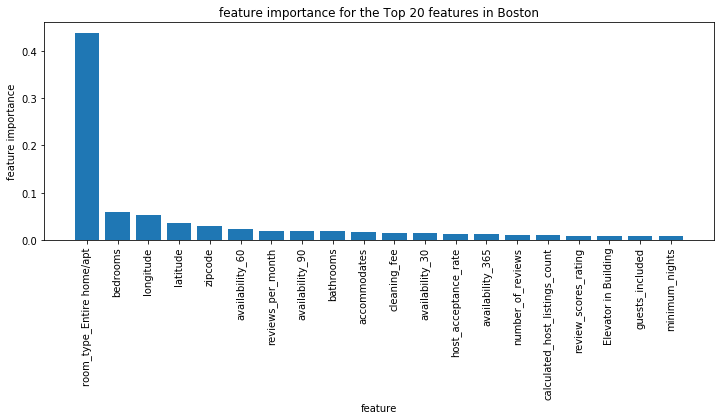

In [49]:
### feature importance for both Boston and Seattle Data
feature_importances = RFF_B.feature_importances_
features = sorted(zip(feature_importances, Boston_listing.columns), reverse=True)
feat = []
coef = []
for feature in features:
    feat.append(feature[1]) 
    coef.append(feature[0])
plt.figure(figsize=(12,4))
plt.bar(feat[:20], height=coef[:20])
plt.xticks(rotation=90)
plt.xlabel('feature')
plt.ylabel('feature importance')
plt.title('feature importance for the Top 20 features in Boston')
plt.show()



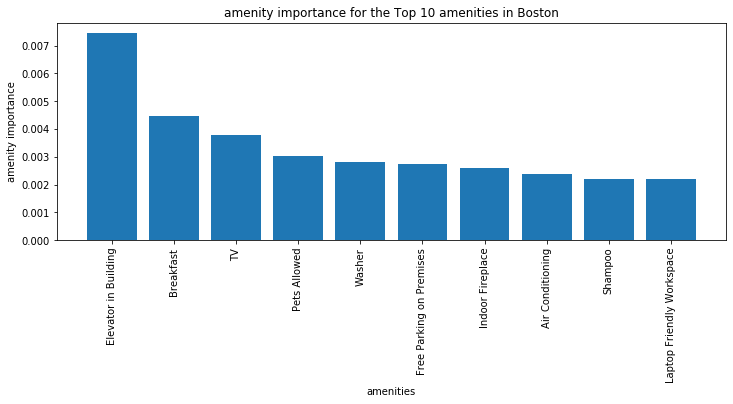

In [50]:
amen = []
coef = []
for feature in features:
    if feature[1] in B_amenities:
        amen.append(feature[1]) 
        coef.append(feature[0])
plt.figure(figsize=(12,4))
plt.bar(amen[:10], height=coef[:10])
plt.xticks(rotation=90)
plt.xlabel('amenities')
plt.ylabel('amenity importance')
plt.title('amenity importance for the Top 10 amenities in Boston')
plt.show()

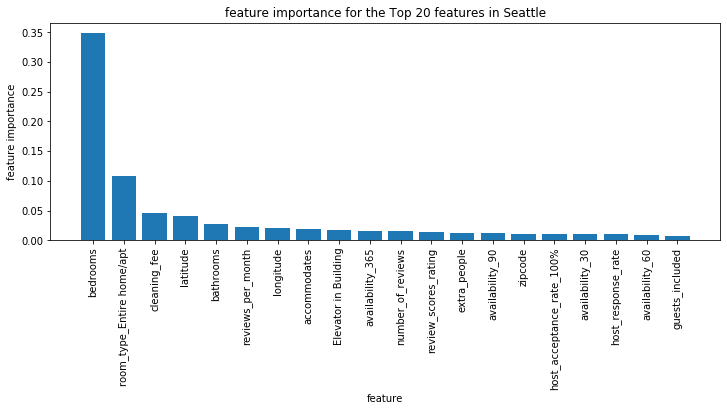

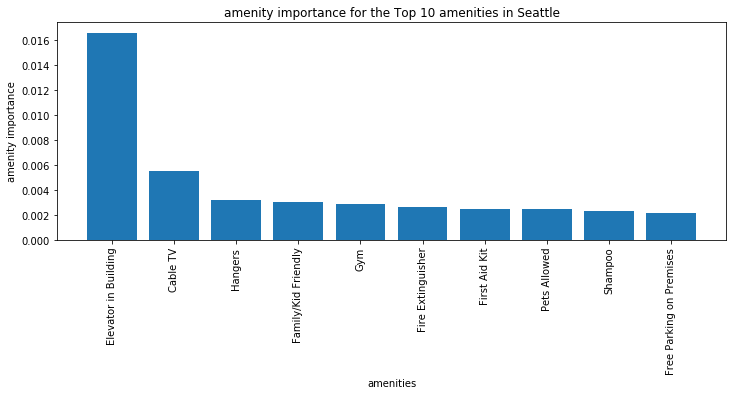

In [51]:
feature_importances = RFF_S.feature_importances_
features = sorted(zip(feature_importances, Seattle_listing.columns), reverse=True)
feat = []
coef = []
for feature in features:
    feat.append(feature[1]) 
    coef.append(feature[0])
plt.figure(figsize=(12,4))
plt.bar(feat[:20], height=coef[:20])
plt.xticks(rotation=90)
plt.xlabel('feature')
plt.ylabel('feature importance')
plt.title('feature importance for the Top 20 features in Seattle')
plt.show()

amen = []
coef = []
for feature in features:
    if feature[1] in S_amenities:
        amen.append(feature[1]) 
        coef.append(feature[0])
plt.figure(figsize=(12,4))
plt.bar(amen[:10], height=coef[:10])
plt.xticks(rotation=90)
plt.xlabel('amenities')
plt.ylabel('amenity importance')
plt.title('amenity importance for the Top 10 amenities in Seattle')
plt.show()

### Observation
The Roomtype_entire_home/apt and bedrooms are the most dominant features in determining the price in both Seattle and Boston markets. It makes sense as these two factors in the size of the home/apartment. Then the next influencial features in both markets are the location and zip code. <br>
The amenities contribute less in both markets, but interesting to observe that elevator in building is the most desireable amenities in both market. 

In [52]:
price_Boston.quantile(0.99)

350.0

In [53]:
price_Seattle.quantile(0.99)

275.0

In [54]:
len(B_amenities)

46

In [55]:
len(S_amenities)

42